Description of my Stakeholder:

Larry Sanders - Buyer - Waterfront , limited budget, nice & isolated but central neighbourhood without kids (but got some of his own, just doesn’t want his kids to play with other kids .. because of germs)

In [1]:
# Import necessary libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np
from scipy import stats

In [2]:
!pip install plotly

In [3]:
#einlesen der Ausgangsdaten
df = pd.read_csv('King_County_House_prices_dataset.csv')

In [4]:
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 
df['waterfront'].unique()

array([nan,  0.,  1.])

In [5]:
#setzt alle "nan" in Spalte Waterfront durch "2"
df.waterfront.fillna(2, inplace=True)

In [6]:
# Ergänzen von weiteren Spalten
df['price_per_sqft_living'] = df.price / df.sqft_living
df['price_per_sqft_lot'] = df.price / df.sqft_lot
df['date2'] = df.date
#umschreiben des Datums ins Format datetime und Ergänzung der Spalten month und year
df['date2'] = pd.to_datetime(df['date2'])
df['year'] = df['date2'].dt.year
df['month'] = df['date2'].dt.month
df['year_month'] = df.date2.dt.to_period('M')
df.columns
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...      lat     long  sqft_living15  \
0      5650     1.0         2.0   0.0  ...  47.5112 -122.257           1340   
1      7242     2.0         0.0   0.0  ...  47.7210 -122.319           1690   
2     10000     1.0         0.0   0.0  ...  47.7379 -122.233           2720   
3      5000     1.0         0.0   0.0  ...  47.5208 -122.393           1360   
4      8080     1.0         0.0   0.0  ...  47.6168 -122.045           1800   

  sqft_lot15  price_per_sqft_living  price_per_sqft_lot      date2  year  \
0       5650             188.050847           39.274336 2014-10-13  2014   
1       7639             209.338521           74.288870 2014-12-09  2014   
2       8062             233.766234           18.000000 2015-02-25  2015   
3       5000             308.163265          120.800000 2014-12-09  2014   
4       7503             303.571429           63.118812 2015-02-18  2015   

   month  year_month  
0     10     2014-10  
1     12     2014-12  
2      2     2015-02  
3     12     2014-12  
4      2     2015-02  

[5 rows x 27 columns]

In [149]:
#df25=df.groupby('year_month').mean()[['price']].reset_index()

Erklärung der Spaltenbezeichnungen:

lat = Latitude = Breitengrad
long = Longitude =Längengrad
sqft_living15 = The square footage of interior housing living space for the nearest 15 neighbors 
sqft_lot15 = The square footage of the land lots of the nearest 15 neighbors 

In [ ]:
#view - An index from 0 to 4 of how good the view of the property was 
df['view'].unique()

In [ ]:
'''BUILDING CONDITION
Relative to age and grade. Coded 1-5.
1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.'''
df['condition'].unique()

In [ ]:
'''Building grade:

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
4 Generally older, low quality construction. Does not meet code.
5 Low construction costs and workmanship. Small, simple design.
6 Lowest grade currently meeting building code. Low quality materials and simple designs.
7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
9 Better architectural design with extra interior and exterior design and quality.
10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.'''

df['grade'].unique()

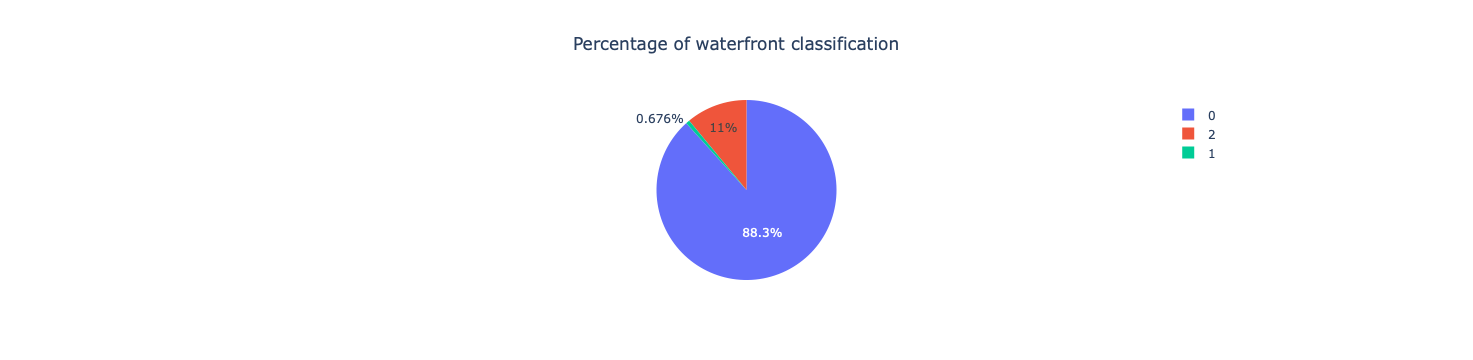

In [168]:
#df_renamed = df
#df_renamed["waterfront_cat"] = df_renamed.waterfront.astype(str)
#df_renamed.waterfront_cat.replace(["0.0","1.0","2.0"],["not on waterfront","on waterfront","not specified"], inplace=True)
#pie_waterfront = px.pie(df_renamed, values='waterfront_cat')
#pie_waterfront.show()
#fig = px.pie(df, values='pop', names='country', title='Population of European continent')
#fig.show()
#labels={'price_min':'Minimum price per category', 'y':'count'}
df25=df.groupby('waterfront').count()[['id']].reset_index()
#df26=df25.waterfront.replace(["0.0","1.0","2.0"],["not on waterfront","on waterfront","not specified"], inplace=True)
pie_waterfront2 = px.pie(df25,values='id', names='waterfront',title='Percentage of waterfront classification')
pie_waterfront2.update_layout(title_x=0.5)
pie_waterfront2.show()

In [174]:
df25


waterfront     id
0         0.0  19075
1         1.0    146
2         2.0   2376

In [8]:
#price bins in df integrieren
df_price_series = pd.cut(df['price'], bins=40, 
                              labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])
df_price_series.name = 'price_bin_all'
df_price_bins = pd.concat([df, df_price_series], axis=1)
df_price_bins.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...     long  sqft_living15  \
0      5650     1.0         2.0   0.0  ... -122.257           1340   
1      7242     2.0         0.0   0.0  ... -122.319           1690   
2     10000     1.0         0.0   0.0  ... -122.233           2720   
3      5000     1.0         0.0   0.0  ... -122.393           1360   
4      8080     1.0         0.0   0.0  ... -122.045           1800   

   sqft_lot15 price_per_sqft_living  price_per_sqft_lot      date2  year  \
0        5650            188.050847           39.274336 2014-10-13  2014   
1        7639            209.338521           74.288870 2014-12-09  2014   
2        8062            233.766234           18.000000 2015-02-25  2015   
3        5000            308.163265          120.800000 2014-12-09  2014   
4        7503            303.571429           63.118812 2015-02-18  2015   

   month  year_month  price_bin_all  
0     10     2014-10              1  
1     12     2014-12              3  
2      2     2015-02              1  
3     12     2014-12              3  
4      2     2015-02              3  

[5 rows x 28 columns]

In [20]:
#erstellt Tabelle gruppiert auf allen 40 price bins
groupby_price_bin_all = df_price_bins.groupby('price_bin_all')
groupby_price_bin_all.count()['id']
#erstellt serie die allen 40 price bins den niedrigsten (Start) Preis des bins zuordnet
price_series_min = groupby_price_bin_all.min()['price']
#merged ursprüngliche Tabelle mit den Preis bins mit der Serie die min Preise je bin enthält
df_price_bins2 = pd.merge(df_price_bins, price_series_min, on=['price_bin_all'],suffixes=['', '_min'])

In [ ]:
#gruppiert die ganze Tabelle auf Basis der price_min und zählt Anzahl je bin
#groupby_price_bin_all2 = df_price_bins2.groupby('price_min')
#groupby_price_bin_all2.count()['id']

In [ ]:
df.info()

In [23]:
#Tabelle nur waterfront
df2 = df.query('waterfront ==1')
df2.shape

(146, 27)

In [24]:
#Tabelle ohne Angabe zu Waterfront
df3 = df.query('waterfront ==2')
df3.shape

(2376, 27)

In [26]:
# alle Häuser mit Angabe Waterfront = ja und nan zusammengefasst
joined_df2_df3 = pd.concat([df2, df3], axis=0)
#joined_df2_df3.head()

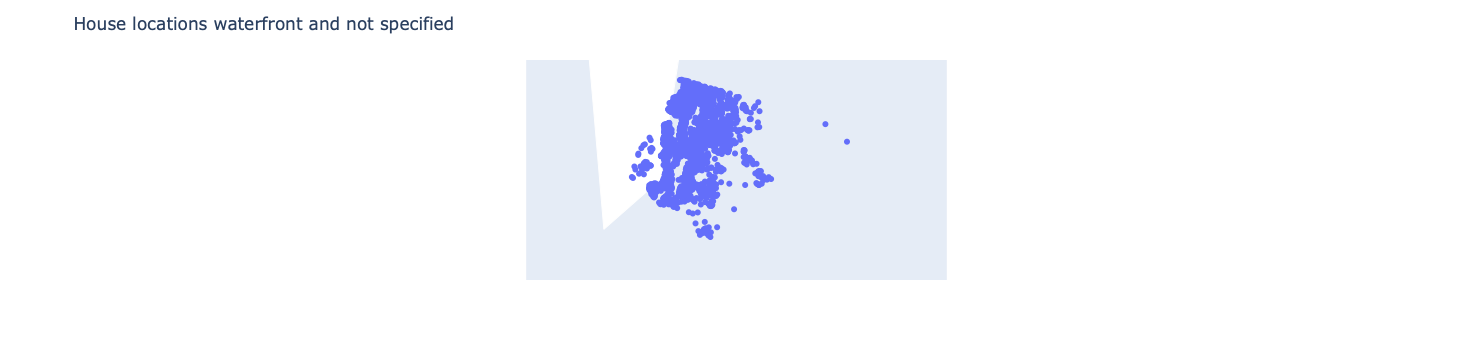

In [30]:
#Plot mit allen locations an der Waterfront und den nicht spezifizierten Locations

fig = px.scatter_geo(joined_df2_df3, lat=joined_df2_df3.lat, lon=joined_df2_df3.long)
fig.update_layout(title = 'House locations in King County with view over Waterfront and not specified', geo_scope='usa') 
fig.update_geos(fitbounds='locations')
fig.show()

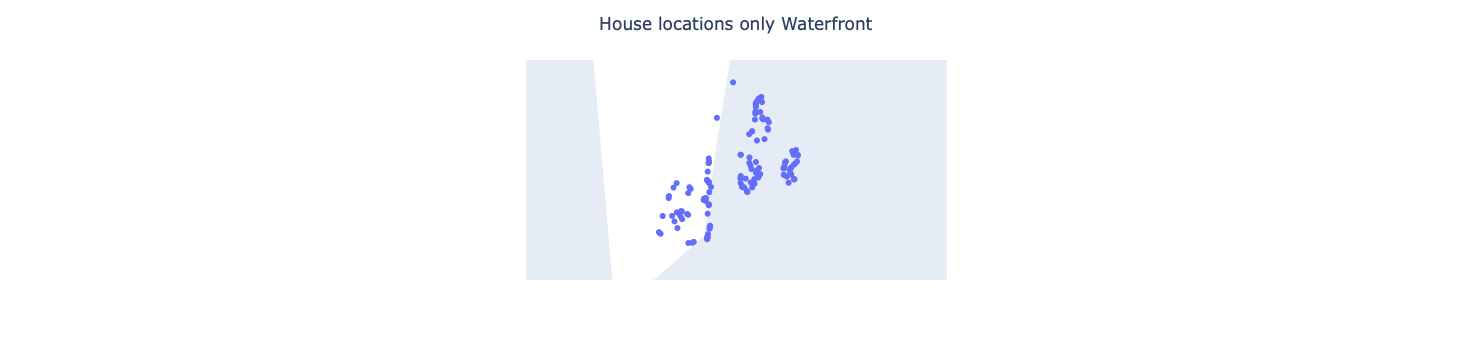

In [175]:
#Plot mit allen locations an der Waterfront
fig2 = px.scatter_geo(df2, lat=df2.lat, lon=df2.long)
fig2.update_layout(title = 'House locations only Waterfront',title_x=0.5, geo_scope='usa') 
fig2.update_geos(fitbounds='locations')
fig2.show()

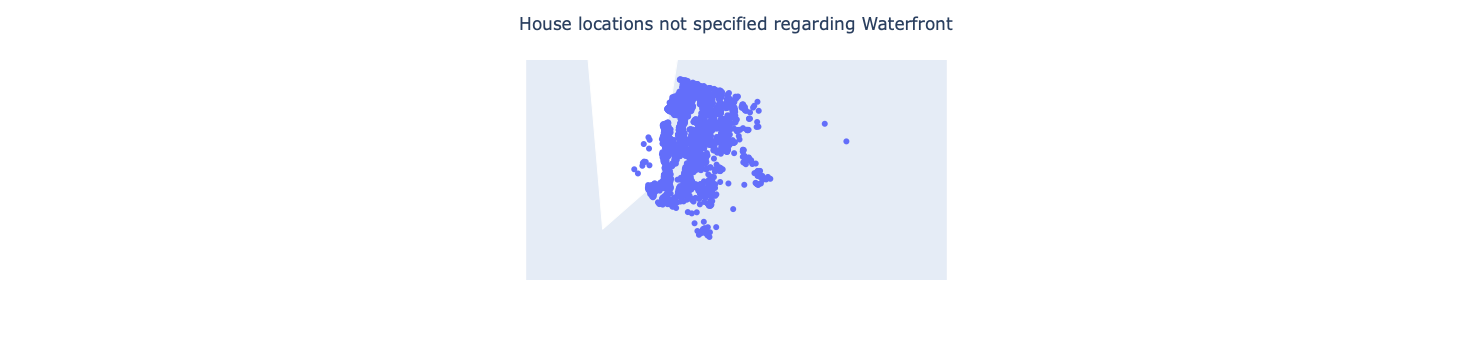

In [185]:
#Plot mit allen locations nan
fig3 = px.scatter_geo(df3, lat=df3.lat, lon=df3.long)
fig3.update_layout(title = 'House locations not specified regarding Waterfront',title_x=0.5, geo_scope='usa') 
fig3.update_geos(fitbounds='locations')
fig3.show()

In [ ]:
df.long.mean()

In [34]:
df4 = df.query('waterfront ==2 and long < -122.220')
df4.shape

(1222, 27)

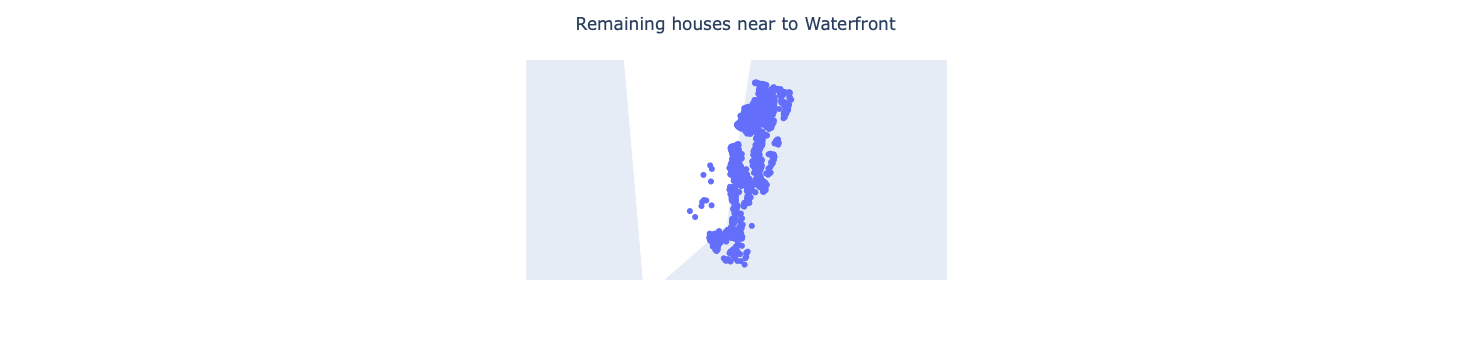

In [187]:
#Plot mit allen locations nan die aufgrund längengrad noch an der Waterfront liegen
fig4 = px.scatter_geo(df4, lat=df4.lat, lon=df4.long)
fig4.update_layout(title = 'Remaining houses near to Waterfront', title_x=0.5, geo_scope='usa') 
fig4.update_geos(fitbounds='locations')
fig4.show()

In [35]:
#Tabelle mit allen Häusern an Waterfront und nans nahe Waterfront
extended_waterfront =pd.concat([df2, df4], axis=0)
extended_waterfront.shape

(1368, 27)

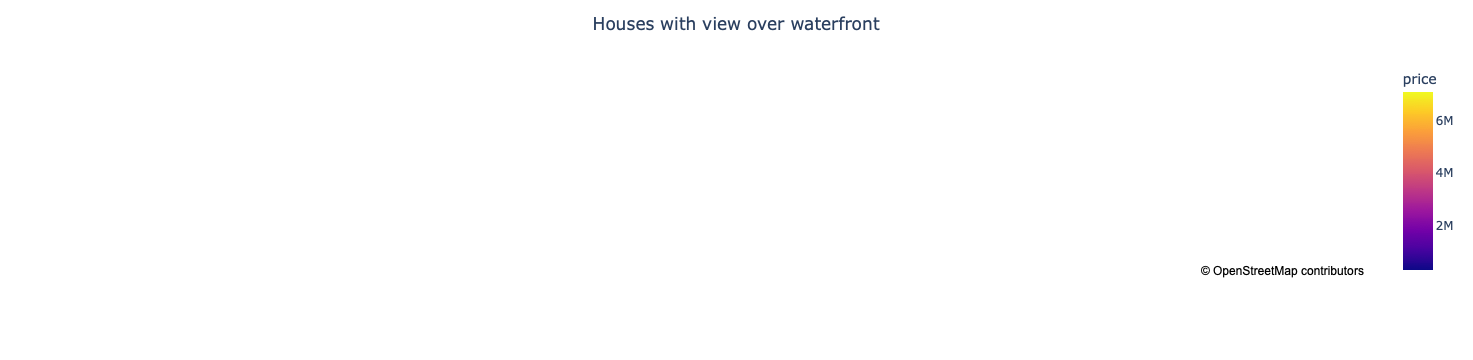

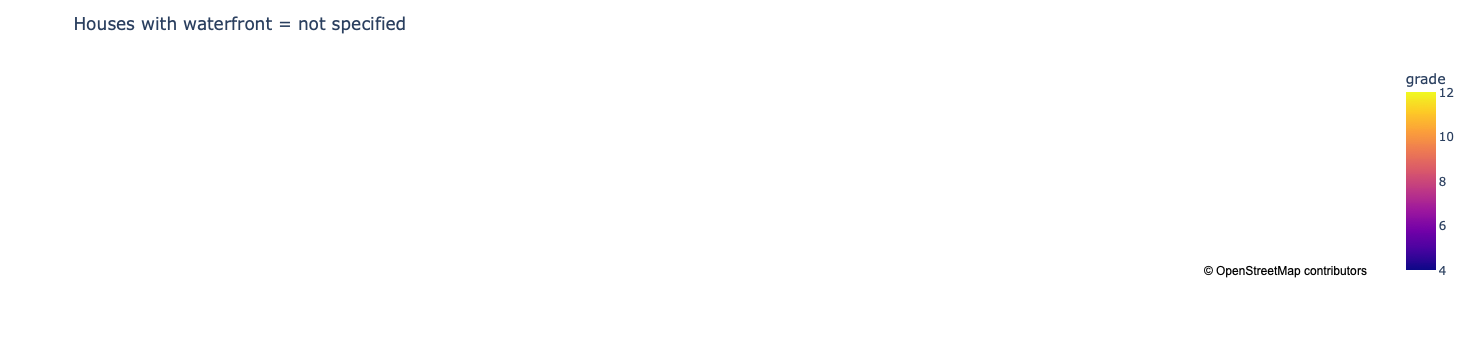

In [179]:
# load dataset in variable "houses" for this code to run; figure created with plotly
houses = joined_df2_df3
fig = px.scatter_mapbox(houses[houses.waterfront==1], lat="lat", lon="long", hover_name="id" , color="price")
fig.update_layout(mapbox_style="open-street-map", title="Houses with view over waterfront", title_x=0.5)
fig.update_geos(fitbounds="locations")
fig.show()
fig = px.scatter_mapbox(houses[houses.waterfront==2], lat="lat", lon="long", hover_name="id" , color="grade")
fig.update_layout(mapbox_style="open-street-map", title="Houses with waterfront = not specified")
fig.update_geos(fitbounds="locations")
fig.show()

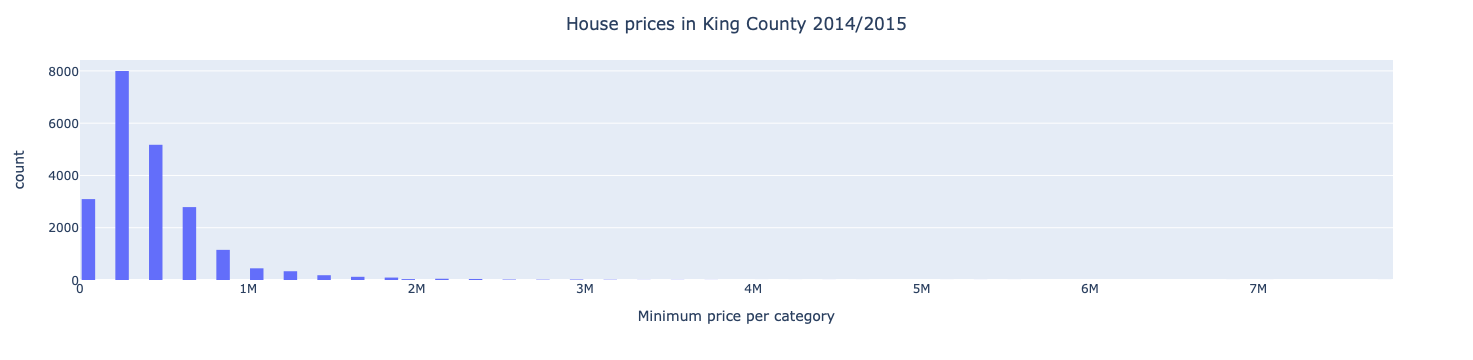

In [95]:
# Histogramm über alle Anfangswerte (min preis) der Preis bins
hist_prices_all = px.histogram(df_price_bins2, x="price_min",labels={'price_min':'Minimum price per category', 'y':'count'})
hist_prices_all.update_layout(bargap=0.2, title="House prices in King County 2014/2015",title_x=0.5)
hist_prices_all.show()

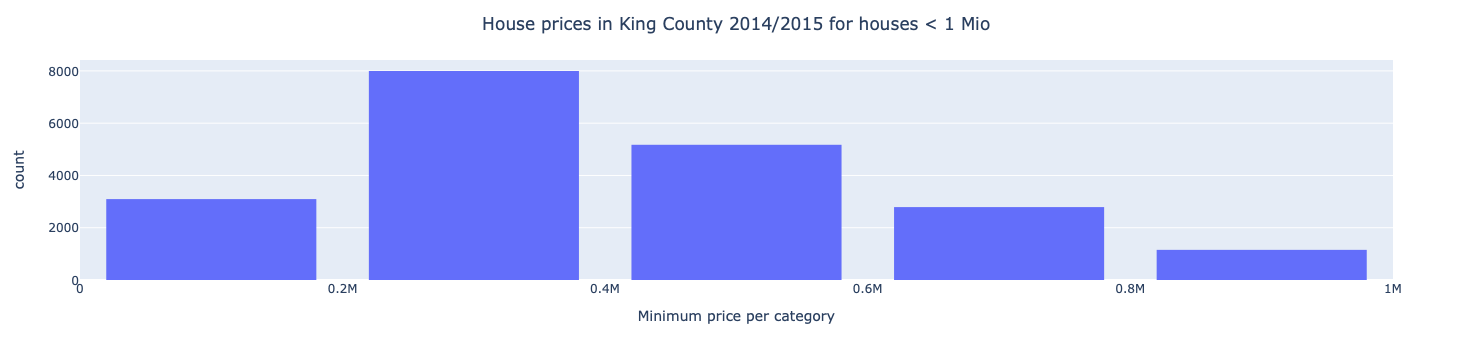

In [96]:
# anhand der Grafik den Preisbereich ausgewählt der interessant ist (< 1000000 und Tabelle dahingehend eingekürzt
relevant_prices = df_price_bins2.query('price_min < 1000000')
# Histogramm über alle Anfangswerte (min preis) der Preis bins unter 1000000
hist_prices_all2 = px.histogram(relevant_prices, x="price_min",labels={'price_min':'Minimum price per category', 'y':'count'})
hist_prices_all2.update_layout(bargap=0.2, title="House prices in King County 2014/2015 for houses < 1 Mio",title_x=0.5)
hist_prices_all2.show()

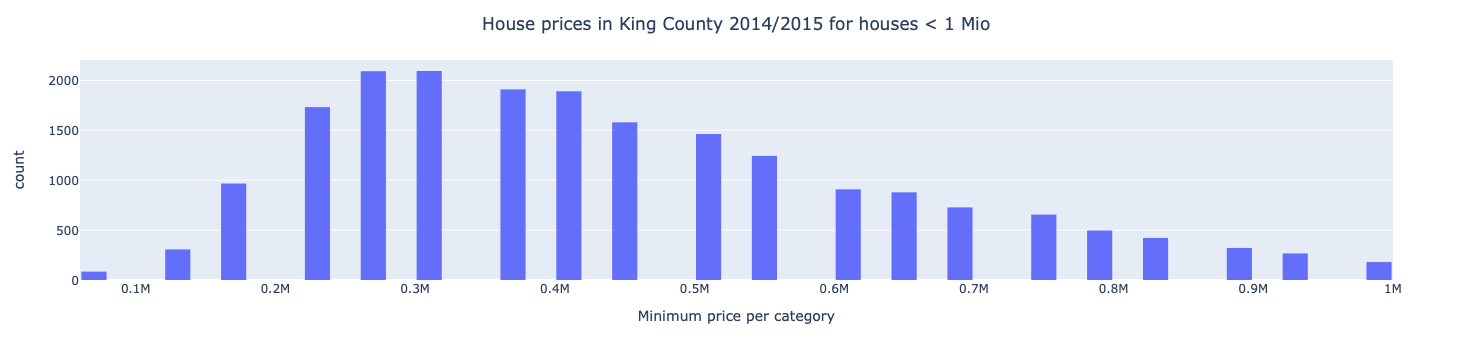

In [97]:
#Feinere Einteilung der bins für alle Häuser mit Preis < 1000000 und mergen der Tabelle mit der neuen bin series
df_price_series_relevant = pd.cut(relevant_prices['price'], bins=20, 
                              labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df_price_series_relevant.name = 'price_bin_relevant'
df_relevant_price_bins = pd.concat([relevant_prices, df_price_series_relevant], axis=1)
groupby_price_bin_relevant = df_relevant_price_bins.groupby('price_bin_relevant')
price_series_min_relevant = groupby_price_bin_relevant.min()['price']
price_series_min_relevant
relevant_prices2 = pd.merge(df_relevant_price_bins, price_series_min_relevant, on=['price_bin_relevant'],suffixes=['', '_min2'])
#Erstellen des histogramms mit neuen bins
hist_prices_all3 = px.histogram(relevant_prices2, x="price_min2",labels={'price_min2':'Minimum price per category', 'y':'count'})
hist_prices_all3.update_layout(bargap=0.1, title="House prices in King County 2014/2015 for houses < 1 Mio", title_x=0.5)
hist_prices_all3.show()

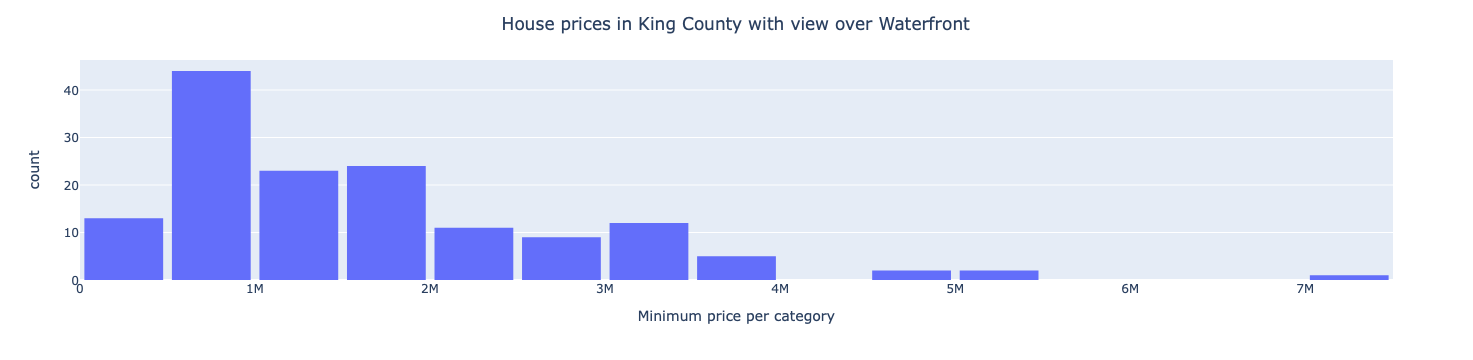

In [98]:
# Einführen von Preis bins in der Tabelle die nur waterfront = 1 enthält
waterfront_price_series = pd.cut(df2['price'], bins=30, 
                              labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
waterfront_price_series.name = 'price_bin_waterfront'
waterfront_prices = pd.concat([df2, waterfront_price_series], axis=1)
#setzen der min Preise der Bins als bin Wert für jedes Haus in diesem bin
groupby_waterfront_prices = waterfront_prices.groupby('price_bin_waterfront')
price_series_min_waterfront = groupby_waterfront_prices.min()['price']
price_series_min_waterfront
waterfront_price_all = pd.merge(waterfront_prices, price_series_min_waterfront, on=['price_bin_waterfront'],suffixes=['', '_min_waterfront'])
#Erstellen des histogramms mit neuen bins nur für die Waterfront Häuser
hist_prices_waterfront = px.histogram(waterfront_price_all, x="price_min_waterfront",labels={'price_min_waterfront':'Minimum price per category', 'y':'count'}, nbins=30)
hist_prices_waterfront.update_layout(bargap=0.1, title="House prices in King County with view over Waterfront",title_x=0.5)
hist_prices_waterfront.show()

In [78]:
#Festlegen des limited Budget des Käufers anhand der Preisverteilung. Annahme Budget:900.000
waterfront_price_relevant = waterfront_price_all.query('price < 900000')
waterfront_price_relevant.shape

(40, 29)

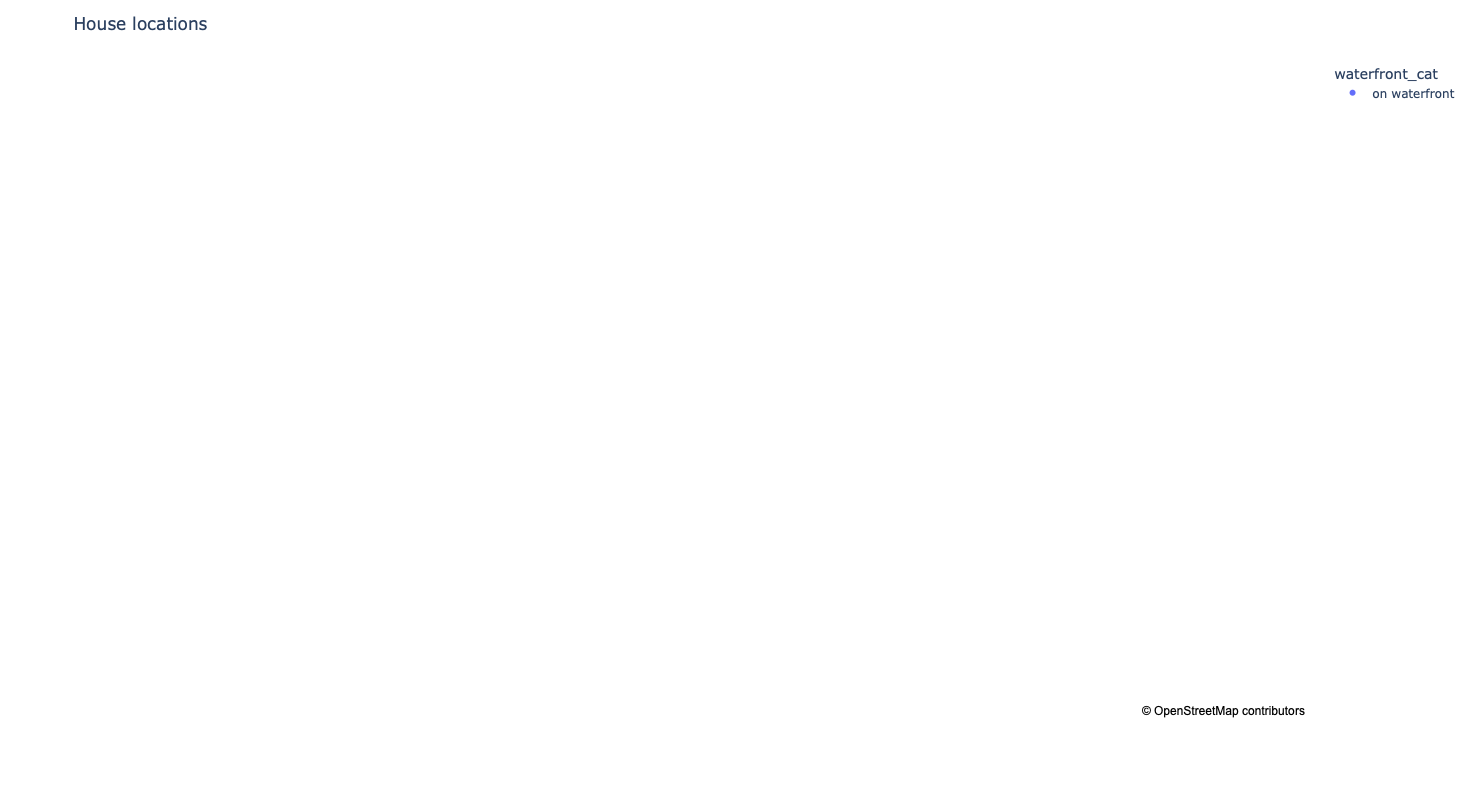

In [178]:
houses2 = waterfront_price_relevant
houses2["waterfront_cat"] = houses2.waterfront.astype(str)

houses2.waterfront_cat.replace(["0.0","1.0","2.0"],["not on waterfront","on waterfront","waterfront unknown"], inplace=True)

fig = px.scatter_mapbox(houses2, lat="lat", lon="long", hover_name="id" , color="waterfront_cat")
fig.update_layout(mapbox_style="open-street-map", title="House locations",              
    autosize=False,width=1200,height=800)
fig.update_geos(fitbounds="locations")
fig.show()

In [80]:
heatmap_waterfront= waterfront_price_relevant.drop('id',axis=1).drop('price_per_sqft_living',axis=1).drop('price_per_sqft_lot',axis=1).drop('year',axis=1).drop('month',axis=1)

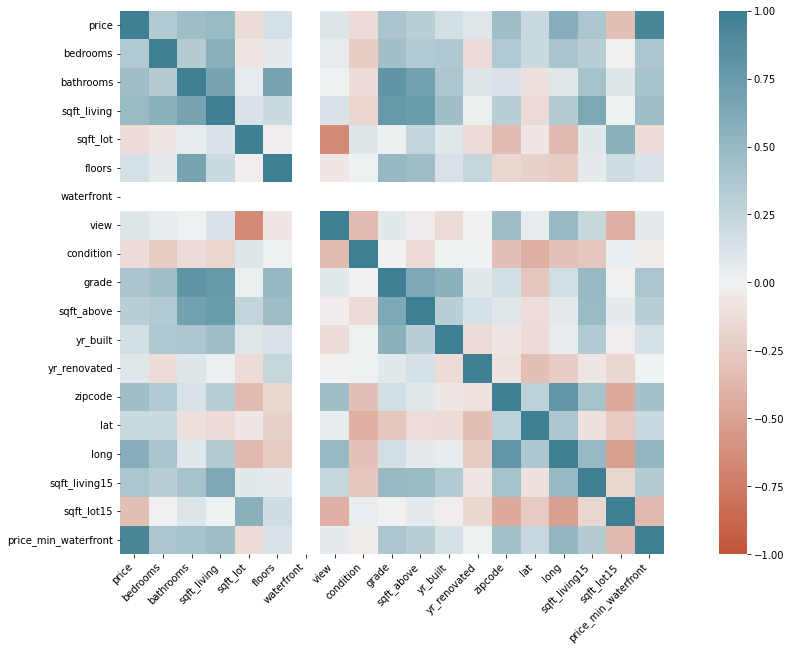

In [88]:
plt.figure(figsize = (20,10))
corr = heatmap_waterfront.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
 #   annot=True, 
 #   fmt="f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

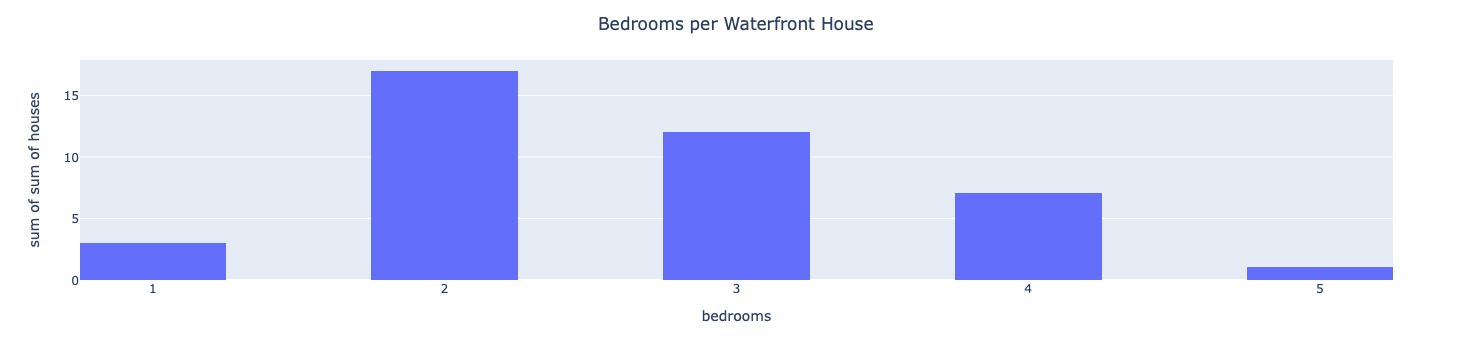

In [180]:
#Annahme das Familie mit Kindern mehr als 2 Bedrooms benötigt
waterfront_groupby_bedrooms = waterfront_price_relevant.groupby('bedrooms',as_index=False)['id'].count()
hist_bedrooms_waterfront = px.histogram(waterfront_groupby_bedrooms, x="bedrooms",y="id",labels={'bedrooms':'bedrooms', 'id':'sum of houses'}, nbins=15)
hist_bedrooms_waterfront.update_layout(bargap=0, title="Bedrooms per Waterfront House", title_x=0.5)
hist_bedrooms_waterfront.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)
hist_bedrooms_waterfront.show()

In [105]:
#Erstellen neuer Liste mit bedrooms>2 da mehrere Kinder
waterfront_bed = waterfront_price_relevant.query('bedrooms >2')
waterfront_bed.shape

(20, 30)

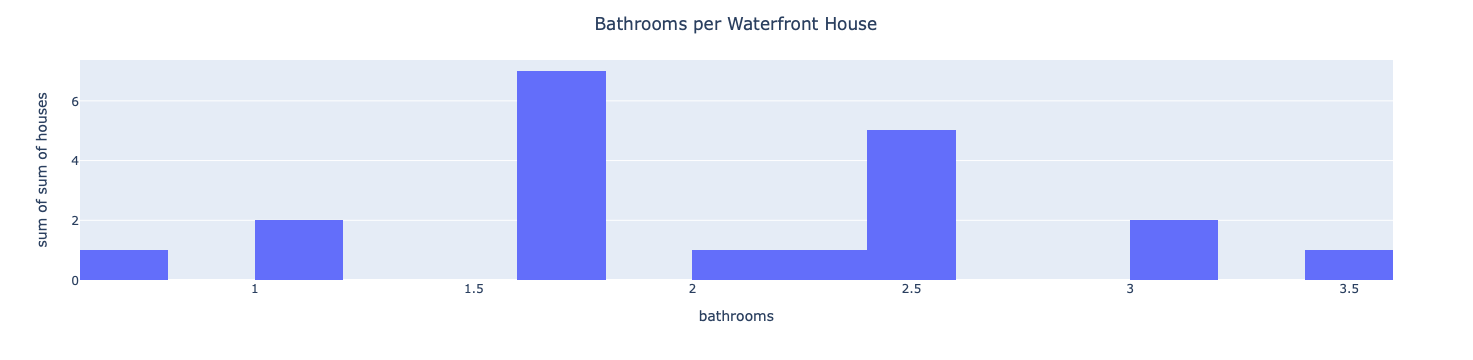

In [181]:
#Annahme das Familie mit Kindern mehr als 1 Badezimmer benötigt
groupby_bathrooms = waterfront_bed.groupby('bathrooms',as_index=False)['id'].count()
hist_bathrooms_waterfront = px.histogram(groupby_bathrooms, x="bathrooms",y="id",labels={'bathrooms':'bathrooms','id':'sum of houses'}, nbins=20)
hist_bathrooms_waterfront.update_layout(bargap=0, title="Bathrooms per Waterfront House", title_x=0.5)
hist_bathrooms_waterfront.show()

In [113]:
#neue Liste mit bathrooms>1 da mehrere Personen
waterfront_bed_bath = waterfront_bed.query('bathrooms >1')
waterfront_bed_bath.shape

(17, 30)

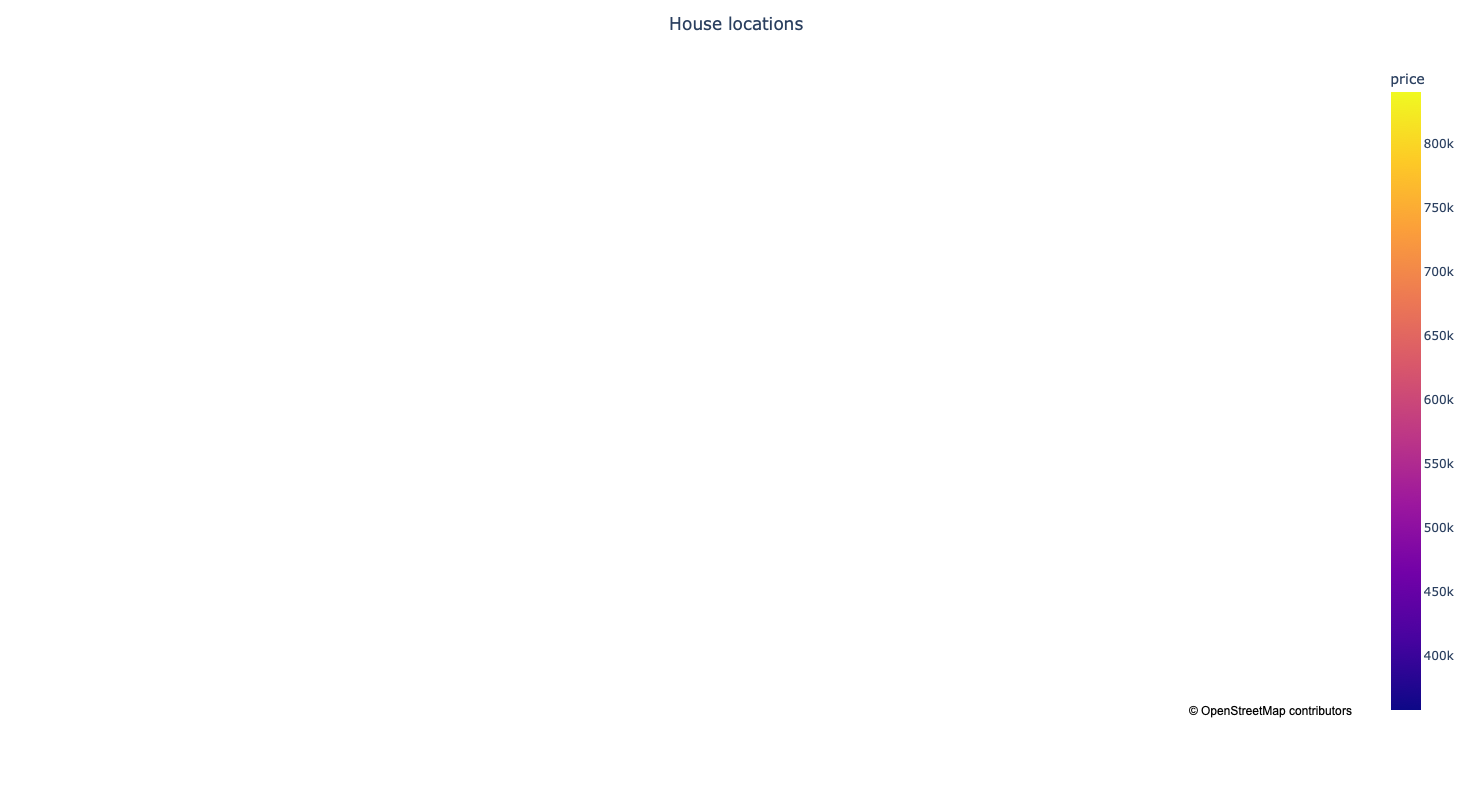

In [182]:
fig8 = px.scatter_mapbox(waterfront_bed_bath, lat="lat", lon="long", hover_name="id" , color="price")
fig8.update_layout(mapbox_style="open-street-map", title="House locations", title_x=0.5,             
    autosize=False,width=1200,height=800)
fig8.update_geos(fitbounds="locations")
fig8.show()

In [115]:
# Überprüfen ob die Häuser sqft groß genug sind für Familie 120qm = 1290 sqft
waterfront_bed_bath_size = waterfront_bed_bath.query('sqft_living > 1290')
waterfront_bed_bath_size.shape
# alle Häuser sind größer als 120 qm2

(17, 30)

In [116]:
#neue Liste mit bedrooms<2 um zu gucken in welcher Gegend die meisten kleinen Häuser sind = wenig Kinder
less_children = df.query('bedrooms < 2')
groupby_zipcode5 = less_children.groupby('zipcode',as_index=False)['id'].count()
#Auswahl der top 10 zipcodes
largest=groupby_zipcode5.nlargest(10, ['id']) 
#umwandeln der zipcodes in Liste
list_zipcode= largest['zipcode'].tolist()
list_zipcode

[98117, 98118, 98126, 98103, 98106, 98014, 98122, 98144, 98146, 98019]

In [117]:
#übrig gebliebene Häuser filtern auf zipcodes in denen viele kleine Häuser verkauft werden
waterfront_all_in = waterfront_bed_bath_size.query('zipcode == @list_zipcode')
waterfront_all_in.shape

(2, 30)

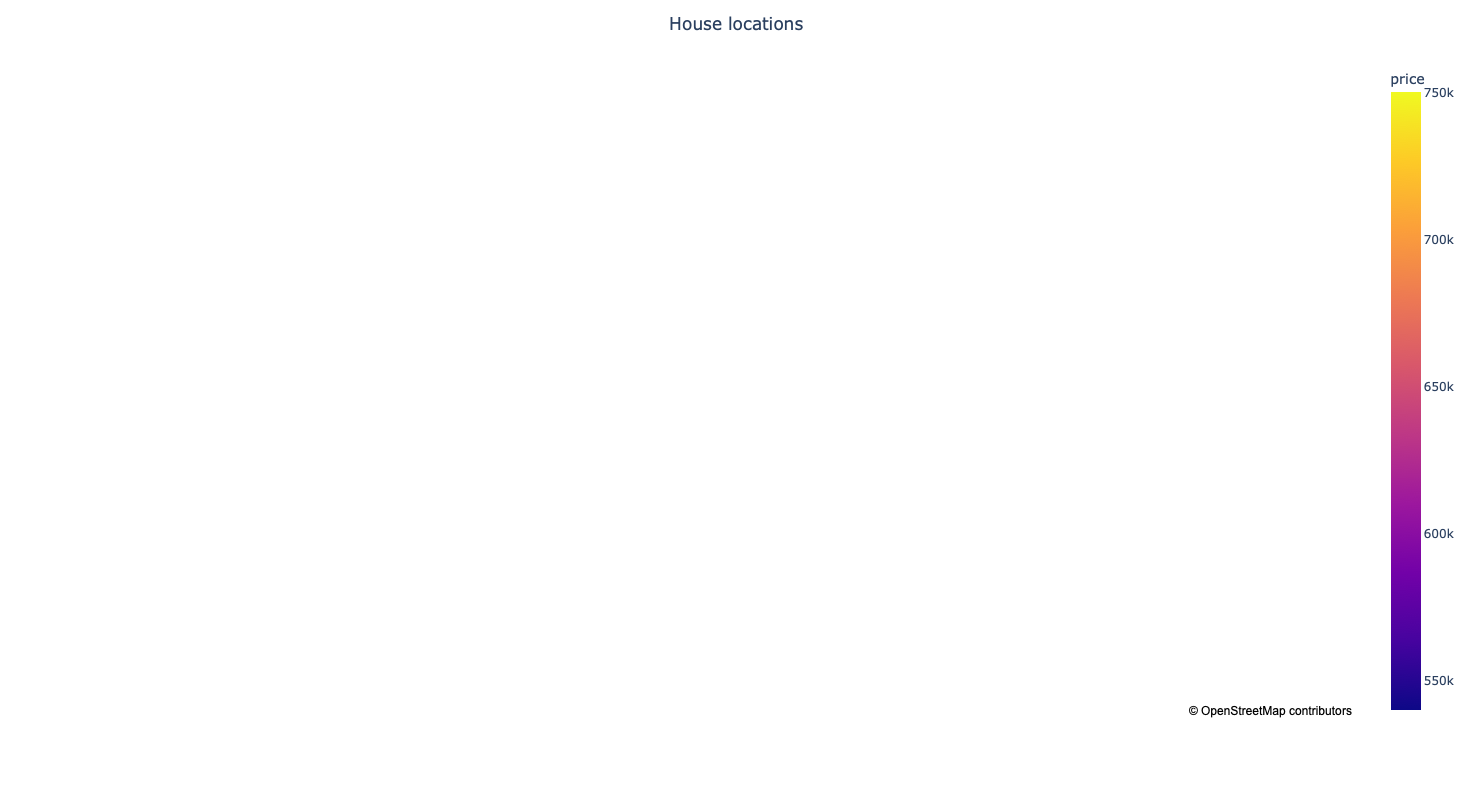

In [183]:
fig9 = px.scatter_mapbox(waterfront_all_in, lat="lat", lon="long", hover_name="id" , color="price")
fig9.update_layout(mapbox_style="open-street-map", title="House locations", title_x=0.5,              
    autosize=False,width=1200,height=800)
fig9.update_geos(fitbounds="locations")
fig9.show()

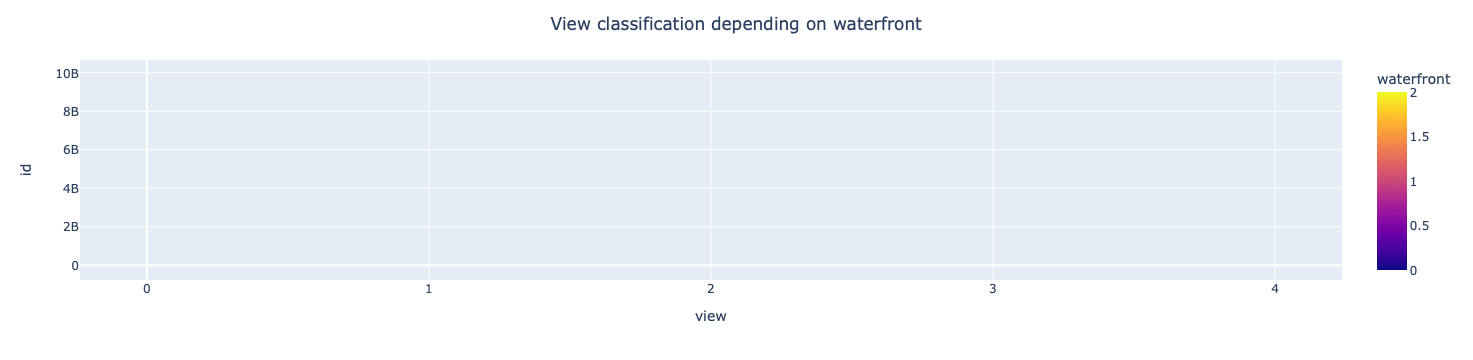

In [123]:
#chart um zu zeigen das view eng mit Waterfront zusammenhängt
waterfront_view = px.scatter(df, x="view", y="id", color="waterfront")
waterfront_view.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)
waterfront_view.update_layout(title="View classification depending on waterfront", title_x=0.5)
waterfront_view.show()

In [124]:
#Tabelle mit extended waterfront gefiltert auf Häuser < 900000 und view >3; extended beinhaltet auch alle Häuser die nach Längengrad noch grob als Waterfront eingestuft werden können (eig. Festlegung)
extended_waterfront2 = extended_waterfront.query('price < 500000 and view > 3')
extended_waterfront2.shape

(9, 27)

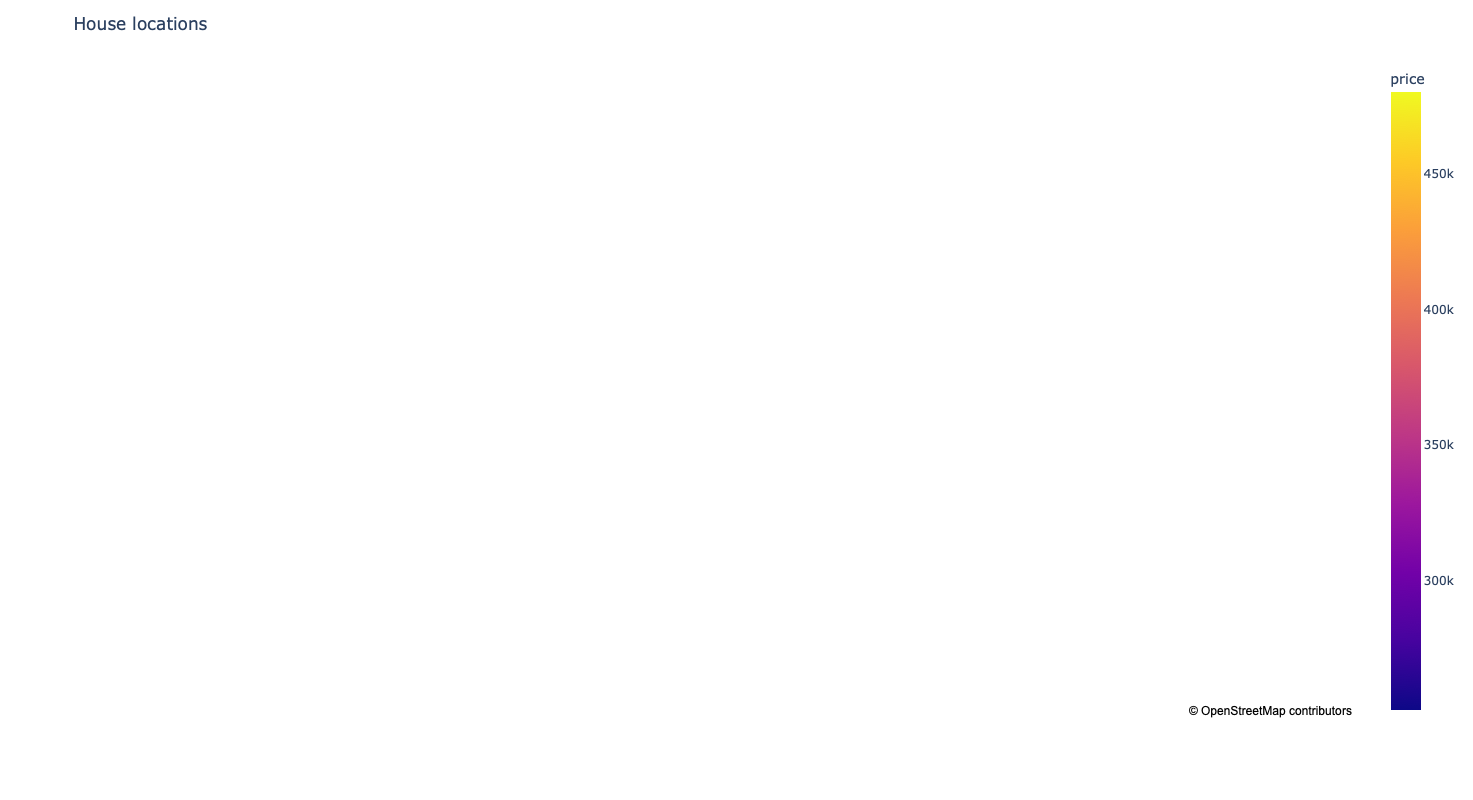

In [188]:
fig44 = px.scatter_mapbox(extended_waterfront2, lat="lat", lon="long", hover_name="id" , color="price")
fig44.update_layout(mapbox_style="open-street-map", title="House locations",              
    autosize=False,width=1200,height=800)
fig44.update_geos(fitbounds="locations")
fig44.show()

In [192]:
extended_waterfront_bed_bath = extended_waterfront2.query('bedrooms > 2 and bathrooms > 1')
extended_waterfront_bed_bath.shape

(3, 27)

In [191]:
extended_waterfront_bed_bath2 = extended_waterfront_bed_bath.query('zipcode == @list_zipcode')
extended_waterfront_bed_bath2.shape

(0, 27)

In [193]:
#zusammenfügen der beiden Listen mit den letzten Häusern
last_houses = pd.concat([waterfront_bed_bath_size,extended_waterfront_bed_bath], axis=0)
last_houses

id        date     price  bedrooms  bathrooms  sqft_living  \
16     2122039094  11/26/2014  705000.0         3       3.00         1970   
19     3222049055   1/16/2015  650000.0         3       1.75         2800   
20      121039083    2/6/2015  629000.0         3       1.75         1460   
22     2623029003  12/16/2014  635000.0         3       1.75         1940   
26     8073000491  12/11/2014  700000.0         4       1.75         1950   
27     6329000185   3/29/2015  540000.0         3       2.50         2600   
40      221029019   4/28/2015  400000.0         3       2.50         2090   
41     2013802030   9/11/2014  357000.0         3       2.00         2460   
46     7631800110   9/18/2014  380000.0         3       2.50         1980   
63     8069000075  12/29/2014  790000.0         4       1.75         2460   
66     7567600030   1/27/2015  750000.0         5       1.75         2640   
68     2623039082   2/18/2015  770000.0         3       3.50         2050   
69     3222049044   6/12/2014  835000.0         3       3.00         2790   
71     8073000585   7/15/2014  840500.0         4       2.25         2290   
73     6329000190   7/29/2014  750000.0         4       1.75         2520   
75     5215200050   7/29/2014  750000.0         3       2.50         2960   
76     3222049151  10/30/2014  820000.0         3       2.50         2990   
8270    221029019   4/28/2015  400000.0         3       2.50         2090   
11544  2013802030   9/11/2014  357000.0         3       2.00         2460   
18833  7631800110   9/18/2014  380000.0         3       2.50         1980   

       sqft_lot  floors  waterfront  view  ...  sqft_lot15  \
16        20978     2.0         1.0   3.0  ...       75396   
19        19386     1.0         1.0   4.0  ...       31450   
20        12367     2.0         1.0   4.0  ...       18893   
22       167125     1.0         1.0   1.0  ...      127195   
26         7139     1.0         1.0   4.0  ...       13122   
27        23361     1.5         1.0   4.0  ...       14700   
40        32718     2.0         1.0   4.0  ...      192268   
41        53882     1.0         1.0   4.0  ...       32625   
46        17342     2.0         1.0   4.0  ...       17313   
63        10061     1.0         1.0   4.0  ...       10061   
66        13290     1.0         1.0   4.0  ...       11942   
68        21744     2.0         1.0   4.0  ...       12200   
69        12523     2.0         1.0   4.0  ...       11476   
71        12174     1.0         1.0   4.0  ...        9379   
73        21834     1.0         1.0   4.0  ...        8100   
75        69351     2.0         1.0   3.0  ...       41433   
76        10711     1.0         1.0   4.0  ...       11476   
8270      32718     2.0         1.0   4.0  ...      192268   
11544     53882     1.0         1.0   4.0  ...       32625   
18833     17342     2.0         1.0   4.0  ...       17313   

       price_per_sqft_living  price_per_sqft_lot      date2  year  month  \
16                357.868020           33.606636 2014-11-26  2014     11   
19                232.142857           33.529351 2015-01-16  2015      1   
20                430.821918           50.861163 2015-02-06  2015      2   
22                327.319588            3.799551 2014-12-16  2014     12   
26                358.974359           98.052949 2014-12-11  2014     12   
27                207.692308           23.115449 2015-03-29  2015      3   
40                191.387560           12.225686 2015-04-28  2015      4   
41                145.121951            6.625589 2014-09-11  2014      9   
46                191.919192           21.912121 2014-09-18  2014      9   
63                321.138211           78.521022 2014-12-29  2014     12   
66                284.090909           56.433409 2015-01-27  2015      1   
68                375.609756           35.412068 2015-02-18  2015      2   
69                299.283154           66.677314 2014-06-12  2014      6   
71                367.030568  

In [198]:
#letzte Überprüfung ob Häuser auch grade>6 entsprechen
last_houses3 = last_houses.query('grade > 7')
last_houses3.shape

(12, 30)

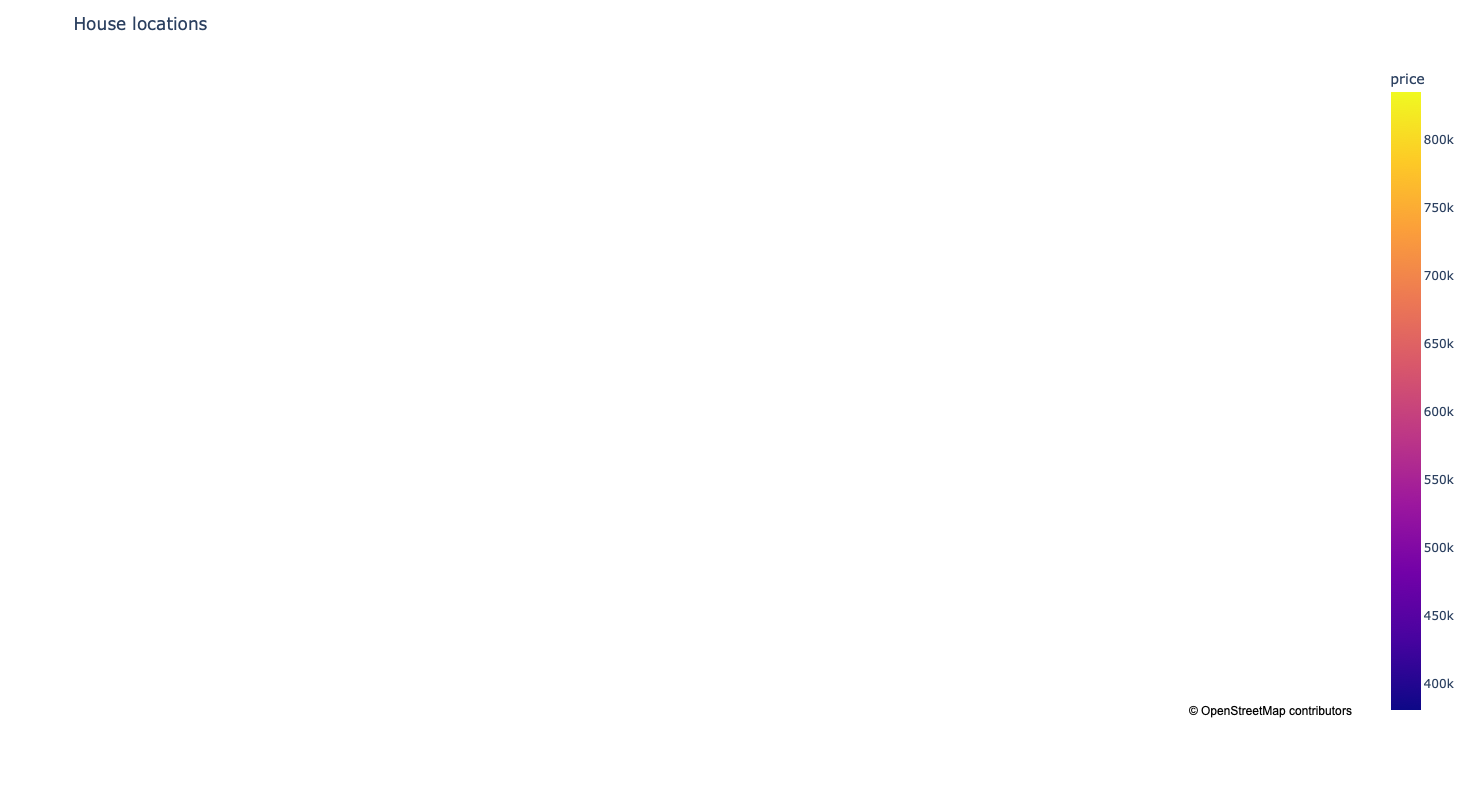

In [199]:
fig44 = px.scatter_mapbox(last_houses3, lat="lat", lon="long", hover_name="id" , color="price")
fig44.update_layout(mapbox_style="open-street-map", title="House locations",              
    autosize=False,width=1200,height=800)
fig44.update_geos(fitbounds="locations")
fig44.show()

In [203]:
#Liste etwas übersichtlicher mit weniger Spalten
last_houses_3 = last_houses2[['id', 'price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','price_per_sqft_living','yr_built','yr_renovated','zipcode']]
last_houses_3.sort_values('price')

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
46     7631800110  380000.0         3       2.50         1980     17342   
18833  7631800110  380000.0         3       2.50         1980     17342   
27     6329000185  540000.0         3       2.50         2600     23361   
20      121039083  629000.0         3       1.75         1460     12367   
19     3222049055  650000.0         3       1.75         2800     19386   
16     2122039094  705000.0         3       3.00         1970     20978   
66     7567600030  750000.0         5       1.75         2640     13290   
73     6329000190  750000.0         4       1.75         2520     21834   
75     5215200050  750000.0         3       2.50         2960     69351   
68     2623039082  770000.0         3       3.50         2050     21744   
76     3222049151  820000.0         3       2.50         2990     10711   
69     3222049044  835000.0         3       3.00         2790     12523   

       floors  waterfront  view  price_per_sqft_living  yr_built  \
46        2.0         1.0   4.0             191.919192      1984   
18833     2.0         1.0   4.0             191.919192      1984   
27        1.5         1.0   4.0             207.692308      1912   
20        2.0         1.0   4.0             430.821918      1970   
19        1.0         1.0   4.0             232.142857      1965   
16        2.0         1.0   3.0             357.868020      1980   
66        1.0         1.0   4.0             284.090909      1954   
73        1.0         1.0   4.0             297.619048      1960   
75        2.0         1.0   3.0             253.378378      1990   
68        2.0         1.0   4.0             375.609756      1930   
76        1.0         1.0   4.0             274.247492      1976   
69        2.0         1.0   4.0             299.283154      1977   

       yr_renovated  zipcode  
46              0.0    98166  
18833           0.0    98166  
27              0.0    98146  
20              0.0    98023  
19              0.0    98198  
16              0.0    98070  
66              0.0    98178  
73              0.0    98146  
75              0.0    98070  
68              0.0    98166  
76           1991.0    98198  
69              NaN    98198

In [130]:
ziplist = last_houses2['zipcode'].unique()
ziplist

array([98070, 98198, 98166, 98146])

In [63]:
list_zipcode= [98070, 98198, 98166, 98146]
list_zipcode

[98070, 98198, 98166, 98146]

In [64]:
#ursprünglichen Datensatz filtern auf relevante zipcodes
df_times = df.query('zipcode == @list_zipcode')
df_times.shape

(939, 27)

In [134]:
#nach Monaten gruppieren und anzahl der verkauften Häuser ausgeben
groupby_date2 = df_times.groupby('month',as_index=False)['id'].count()
groupby_date2

month   id
0       1   56
1       2   57
2       3   91
3       4   89
4       5  105
5       6  103
6       7   93
7       8   82
8       9   77
9      10   69
10     11   64
11     12   53

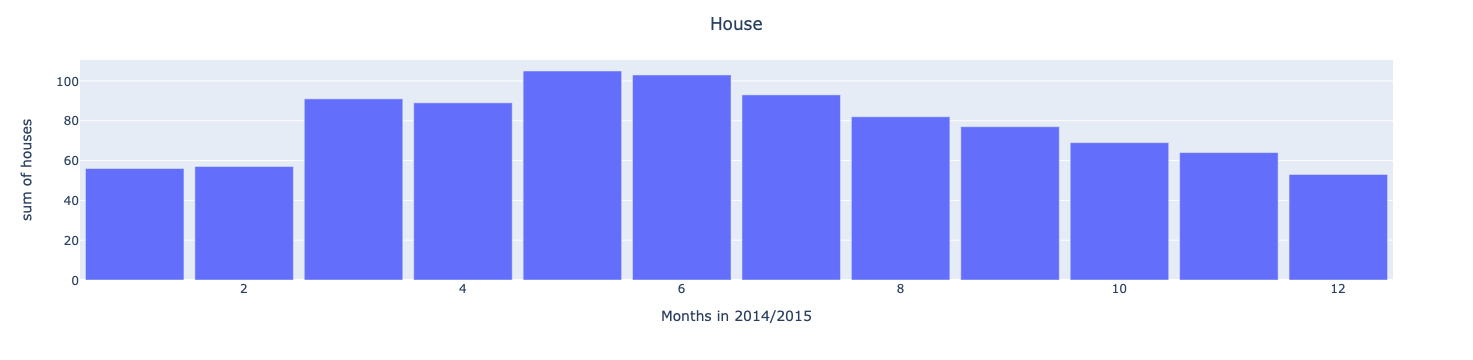

In [135]:
#Häuserverkäufe pro Monat über 2 Jahre in den zipcodes der last Houses
fig_times=px.bar(groupby_date2, x='month',y='id',labels={'month':'Months in 2014/2015', 'id':'sum of houses'})
fig_times.update_layout(bargap=0.1, title="Sum of House sales in 2014 ",title_x=0.5)
fig_times.show()

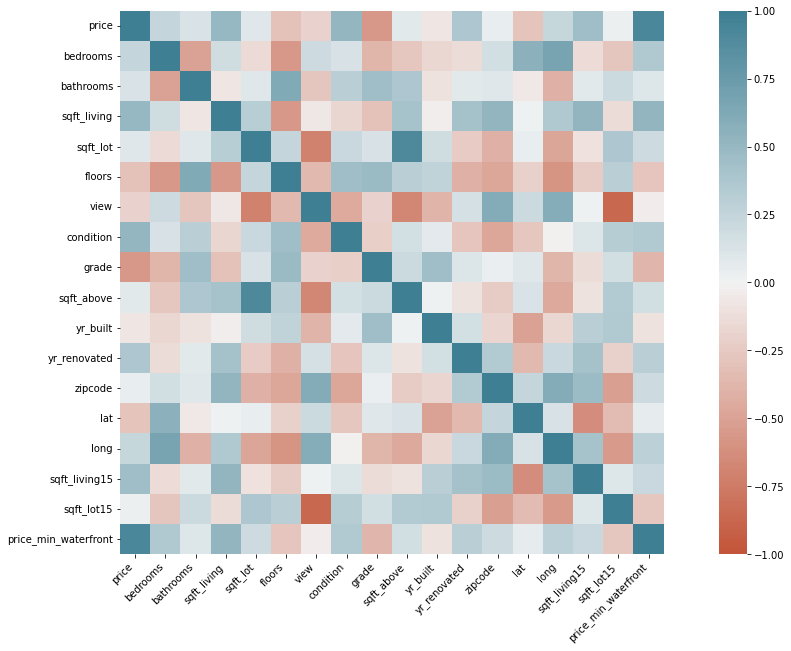

In [202]:
for_heatmap2= last_houses3.drop('id',axis=1).drop('price_per_sqft_living',axis=1).drop('price_per_sqft_lot',axis=1).drop('year',axis=1).drop('month',axis=1).drop('waterfront',axis=1)
plt.figure(figsize = (20,10))
corr = for_heatmap2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);